In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
ealaxi_paysim1_path = kagglehub.dataset_download('ealaxi/paysim1')

print('Data source import complete.')
# roc_auc_score(y_test,pred)


100%|██████████| 178M/178M [00:03<00:00, 47.2MB/s]

Extracting files...


Data source import complete.
Data source import complete.


# Business Understanding
## Blocker Fraud Company
The Blocker Fraud Company is a company specialized in detecting fraud in financial transactions made through mobile devices. The company has a service called “Blocker Fraud” with no guarantee of blocking fraudulent transactions.

And the business model of the company is of the Service type with the monetization made by the performance of the service provided, that is, the user pays a fixed fee on the success in detecting fraud in the customer's transactions.

### Expansion Problem
Blocker Fraud Company is expanding in Brazil and to acquire customers more quickly, it has adopted a very aggressive strategy. The strategy works as follows:

The company will receive 25% of the value of each transaction that is truly detected as fraud.
The company will receive 5% of the value of each transaction detected as fraud, but the transaction is truly legitimate.
The company will return 100% of the value to the customer, for each transaction detected as legitimate, however the transaction is truly a fraud.
i.ii The Challenge
You need to deliver to the CEO of Blocker Fraud Company a production model in which your access will be done via API, that is, customers will send their transactions via API so that your model classifies them as fraudulent or legitimate.

### Business Questions
#### What is the model's Precision and Accuracy?
#### How Reliable is the model in classifying transactions as legitimate or fraudulent?
#### What is the Expected Billing by the Company if we classify 100% of transactions with the model?
#### What is the Loss Expected by the Company in case of model failure?
##### What is the Profit Expected by the Blocker Fraud Company when using the model?

# Business Assumptions
Fraud prevention is the implementation of a strategy to detect fraudulent transactions or banking actions and prevent these actions from causing financial damage and the reputation of the client and the financial institution.

There are always financial frauds and They can happen through virtual and physical ways. So the investment in security has been increasing.

The losses caused by fraud can reach R$ 1 billion - which corresponds to half the amount that institutions invest in technology systems aimed at information security every year, according to Febraban's 2020 Banking Technology Survey.



# Solution Strategy
My solution to solve this problem will be the development of a data science project. This project will have a machine learning model which can predict whether a transaction is fraudulent or not.

## 1. Data Description:
In this first section the data will be collected and studied. The missing values will be threated or removed. Finally, a initial data description will carried out to know the data. Therefore some calculations of descriptive statistics will be made, such as kurtosis, skewness, media, fashion, median and standard desviation.

## 2. Feature Engineering:
In this section, a mind map will be created to assist the creation of the hypothesis and the creation of new features. These assumptions will help in exploratory data analysis and may improve the model scores.

## 3. Data Filtering:
Data filtering is used to remove columns or rows that are not part of the business. For example, columns with customer ID, hash code or rows with age that does not consist of human age.

## 4. Exploratory Data Analysis:
The exploratory data analysis section consists of univariate analysis, bivariate analysis and multivariate analysis to assist in understanding of the database. The hypothesis created in step 02 will be tested in the bivariate analysis.

## 5. Data Preparation:
In this fifth section, the data will be prepared for machine learning modeling. Therefore, they will be transformed to improve the learning of the machine learning model, thus they can be encoded, oversampled, subsampled or rescaled.

## 6. Feature Selection:
After the data preparation in this section algorithms, like Boruta, will select the best columns to be used for the training of the machine learning model. This reduces the dimensionality of the database and decreases the chances of overfiting.

## 7. Machine Learning Modeling:
Aims to train the machine learning algorithms and how they can predict the data. For validation the model is trained, validated and applied to cross validation to know the learning capacity of the model.

## 8. Hyparameter Fine Tuning:
Firstly selected the best model to be applied in the project, it's important to make a fine tuning of the parameters to improve its scores. The same model performance methods apllied in the step 07 are used.

## 9. Conclusions:
This is a conclusion stage which the generation capacity model is tested using unseen data. In addition, some business questions are answered to show the applicability of the model in the business context.

## 10. Model Deploy:
This is the final step of the data science project. So, in this step the flask api is created and the model and the functions are saved to be implemented in the api.

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_recall_curve

# Importing Data

## Context
There is a lack of public available datasets on financial services and specially in the emerging mobile money transactions domain. Financial datasets are important to many researchers and in particular to us performing research in the domain of fraud detection. Part of the problem is the intrinsically private nature of financial transactions, that leads to no publicly available datasets.

We present a synthetic dataset generated using the simulator called PaySim as an approach to such a problem. PaySim uses aggregated data from the private dataset to generate a synthetic dataset that resembles the normal operation of transactions and injects malicious behaviour to later evaluate the performance of fraud detection methods.

## Content
PaySim simulates mobile money transactions based on a sample of real transactions extracted from one month of financial logs from a mobile money service implemented in an African country. The original logs were provided by a multinational company, who is the provider of the mobile financial service which is currently running in more than 14 countries all around the world.

This synthetic dataset is scaled down 1/4 of the original dataset and it is created just for Kaggle.

This is a sample of 1 row with headers explanation:

1,PAYMENT,1060.31,C429214117,1089.0,28.69,M1591654462,0.0,0.0,0,0

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount -
amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction.

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

CASH-IN: Refers to depositing cash into an account, typically adding funds.

CASH-OUT: Refers to withdrawing cash from an account, usually removing funds.

DEBIT: This can have two meanings:

It can refer to a decrease in the balance of a financial account due to a withdrawal or an expense.

In accounting, it represents an entry that reduces assets or increases liabilities.

PAYMENT: Refers to the transfer of money from one party (payer) to another (payee) in exchange for goods, services, or as settlement of a debt.

TRANSFER: Refers to moving money from one account to another, often between accounts held by the same person or entity.

In [ ]:
data = pd.read_csv("/content/PS_20174392719_1491204439457_log.csv")

# General Information

In [ ]:
data.head()

In [ ]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
data.shape

(6362620, 11)

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.shape

(6362620, 11)

There are no duplicates found in the data

In [ ]:
data.isna().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


There are no NAN Values in the data

In [ ]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
data.nunique()

,0
step,161
type,5
amount,1642325
nameOrig,1737639
oldbalanceOrg,621938
newbalanceOrig,756441
nameDest,738568
oldbalanceDest,1002793
newbalanceDest,833546
isFraud,2


# **EDA**

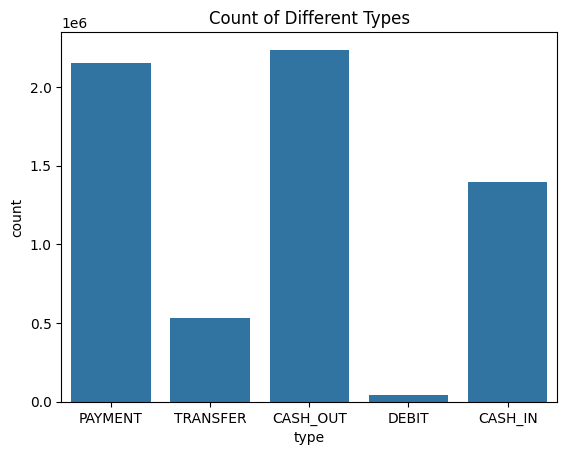

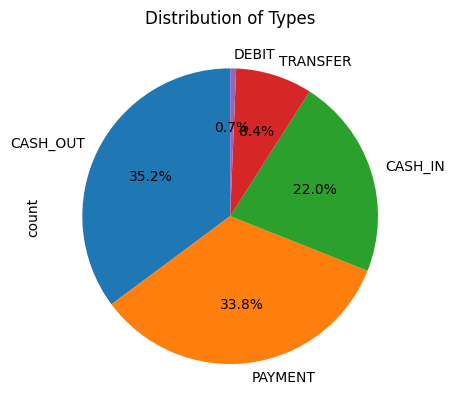

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
sns.countplot(x='type', data=data)  # Change 'df' to 'data'
plt.title('Count of Different Types')
plt.show()

# Pie chart for categorical distribution
data['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90) # Change 'df' to 'data'
plt.title('Distribution of Types')
plt.show()

insights:


* This shows that while CASH_OUT and PAYMENT are nearly equal in proportion, TRANSFER and CASH_IN are less common. DEBIT is a very minimal component of the transaction types.
* The most common types are PAYMENT and TRANSFER, which together account for a significant majority of transactions.
* Understanding the distribution of these transaction types could be valuable for predicting user behavior, detecting fraud, or assessing the performance of financial services related to these transactions.





In [ ]:
import numpy as np
import pandas as pd

def preprocessing(data):
    # Ensure 'nameOrig' and 'nameDest' are strings before processing
    data['nameOrig'] = data['nameOrig'].astype(str)
    data['nameDest'] = data['nameDest'].astype(str)

    # Removing the prefix letter 'C' from 'nameOrig' and converting to integer
    data['nameOrig'] = np.array([x[1:] if len(x) > 1 else '0' for x in data['nameOrig']]).astype(np.int64)

    # Creating a new column 'Desttype' by extracting the prefix letter from 'nameDest'
    data['Desttype'] = [x[0] if len(x) > 0 else 'Unknown' for x in data['nameDest']]

    # Removing the prefix letter from 'nameDest' and converting to integer
    data['nameDest'] = np.array([x[1:] if len(x) > 1 else '0' for x in data['nameDest']]).astype(np.int64)

    # Check if 'type' column exists before applying one-hot encoding
    if 'type' in data.columns:
        data = pd.get_dummies(data, columns=['type'], drop_first=True)

    # Check if 'Desttype' column exists before applying one-hot encoding
    if 'Desttype' in data.columns:
        data = pd.get_dummies(data, columns=['Desttype'], drop_first=True)

    return data


In [ ]:
data=preprocessing(data)
data.head()


,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,...,Desttype_M,Desttype_1,Desttype_2,Desttype_3,Desttype_4,Desttype_5,Desttype_6,Desttype_7,Desttype_8,Desttype_9
0,1,9839.64,31006815,170136.0,160296.36,79787155,0.0,0.0,0,0,...,True,False,False,False,False,False,False,False,False,True
1,1,1864.28,66544295,21249.0,19384.72,4282225,0.0,0.0,0,0,...,True,False,False,False,True,False,False,False,False,False
2,1,181.00,5486145,181.0,0.00,3264065,0.0,0.0,1,0,...,False,False,False,False,False,True,False,False,False,False
3,1,181.00,83671,181.0,0.00,997010,21182.0,0.0,1,0,...,False,False,False,False,False,False,False,False,True,False
4,1,11668.14,8537720,41554.0,29885.86,30701703,0.0,0.0,0,0,...,True,False,True,False,False,False,False,False,False,False


In [ ]:
data = pd.read_csv("/content/PS_20174392719_1491204439457_log.csv")

fraud_transactions = data.loc[data["isFraud"] == 1]
fraud_and_flagged_fraud_transactions = fraud_transactions.loc[fraud_transactions["isFlaggedFraud"] == 1]
fraud_and_not_flagged_fraud_transactions = fraud_transactions.loc[fraud_transactions["isFlaggedFraud"] == 0]
false_flags = data.loc[data["isFlaggedFraud"] == 1].loc[data["isFraud"] == 0]

print("No. of fraud transactions: ", len(fraud_transactions),
      "\nNo. of fraud transactions which were flagged fraud: ", len(fraud_and_flagged_fraud_transactions),
      "\nNo. of fraud transactions which were not flagged fraud: ", len(fraud_and_not_flagged_fraud_transactions),
      "\nNo. of genuine transactions which were falsely flagged fraud: ", len(false_flags))


No. of fraud transactions:  8213 
No. of fraud transactions which were flagged fraud:  16 
No. of fraud transactions which were not flagged fraud:  8197 
No. of genuine transactions which were falsely flagged fraud:  0


So, here lies the problem. The fraud detection algorithms in place are not all accurate enough to detect the fraud transactions. As it can be observed from the above cell that the fraud detection algorithm can only detect 16 out 8213 fraud transactions.

## Count Plot

### Is Fraud

<Axes: xlabel='count', ylabel='isFraud'>

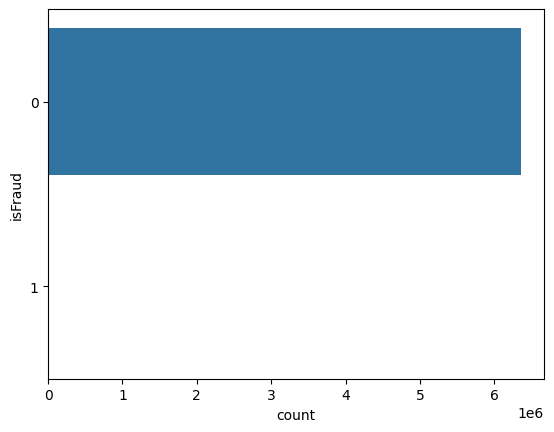

In [ ]:
sns.countplot(data = data, y="isFraud")

## Compare fraud vs non fraud amount

below analysis tell us the quantity of fraudlent cases and non-fraudlent cases from the dataset from kaggle

In [ ]:
amount_fraud = data.groupby("isFraud")["amount"].sum().reset_index()

In [ ]:
amount_fraud

,isFraud,amount
0,0,1.132337e+12
1,1,1.205642e+10


its is obvious that either fraud will happen or it will not happen. hence in box plot only bar is raised for 0 and 1 only.

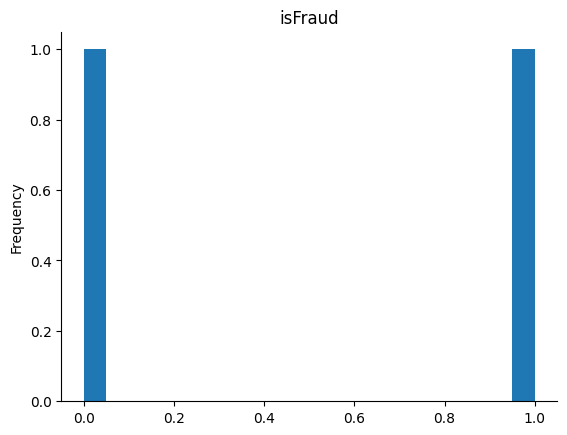

In [ ]:
# @title isFraud

from matplotlib import pyplot as plt
amount_fraud['isFraud'].plot(kind='hist', bins=20, title='isFraud')
plt.gca().spines[['top', 'right',]].set_visible(False)

from below histogram it compares cases of fraudlents cases with non-fraudlents cases

([<matplotlib.axis.XTick at 0x7ce4c3fd59c0>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

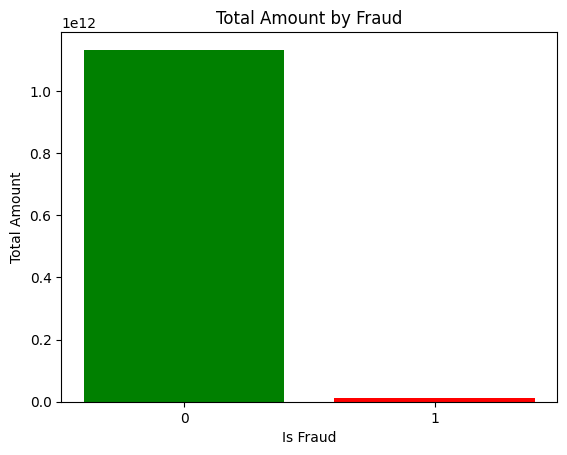

In [ ]:
colors = ["green", "red"]
plt.bar(amount_fraud["isFraud"], amount_fraud["amount"], color=colors)
plt.xlabel("Is Fraud")
plt.ylabel("Total Amount")
plt.title('Total Amount by Fraud')
plt.xticks(amount_fraud['isFraud'])

## Transaction Type vs Fraud Count

this analysis gives us the frauds happening in only CASH_OUT AND TRANSFER type of payment method system and also it gives the count of fraud (isFraud) cases

In [ ]:
transaction_fraud = data.groupby("type")["isFraud"].sum().reset_index()

In [ ]:
transaction_fraud

,type,isFraud
0,CASH_IN,0
1,CASH_OUT,4116
2,DEBIT,0
3,PAYMENT,0
4,TRANSFER,4097


below is the graphical representation of the same which is show in just above cell

([<matplotlib.axis.XTick at 0x7ce4c31e8c10>,
 [Text(0.0, 0, 'CASH_IN'),
  Text(1.0, 0, 'CASH_OUT'),
  Text(2.0, 0, 'DEBIT'),
  Text(3.0, 0, 'PAYMENT'),
  Text(4.0, 0, 'TRANSFER')])

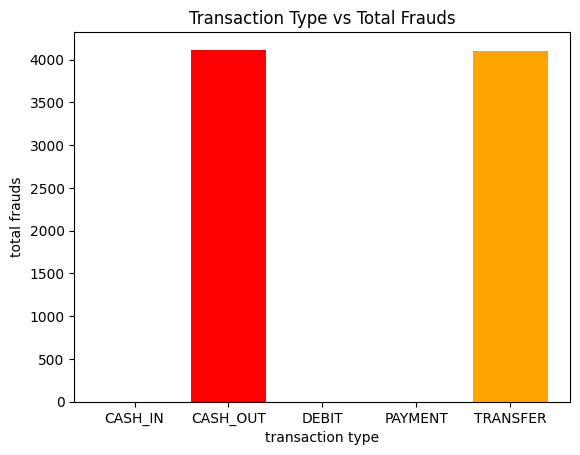

In [ ]:
colors = colors = ["green", "red", "blue", "yellow", "orange"]
plt.bar(transaction_fraud["type"], transaction_fraud["isFraud"], color=colors)
plt.xlabel("transaction type")
plt.ylabel("total frauds")
plt.title("Transaction Type vs Total Frauds")
plt.xticks(transaction_fraud["type"])

Transaction Type: Cash Out and Transfer tends to Fraud

## Fraud vs Type vs Amount

In [ ]:
fraud_type_amount = data.groupby(["isFraud", "type"])["amount"].sum().reset_index()

**From below analysis this we can see that when the type is of 'CASH_OUT' and 'TRANSFER' then only fraud occurs**

In [ ]:
fraud_type_amount


,isFraud,type,amount
0,0,CASH_IN,2.363674e+11
1,0,CASH_OUT,3.884238e+11
2,0,DEBIT,2.271992e+08
3,0,PAYMENT,2.809337e+10
4,0,TRANSFER,4.792248e+11
5,1,CASH_OUT,5.989202e+09
6,1,TRANSFER,6.067213e+09


**From below analysis this we can see the transaction_type vs total frauds histogram and also since we know frauds are in 'CASH_OUT' and 'TRANSFER' case only but it also tells amount of quantities in which frauds actually happened in both the transaction_type**

Text(0.5, 1.0, 'Transaction Type vs Total Frauds')

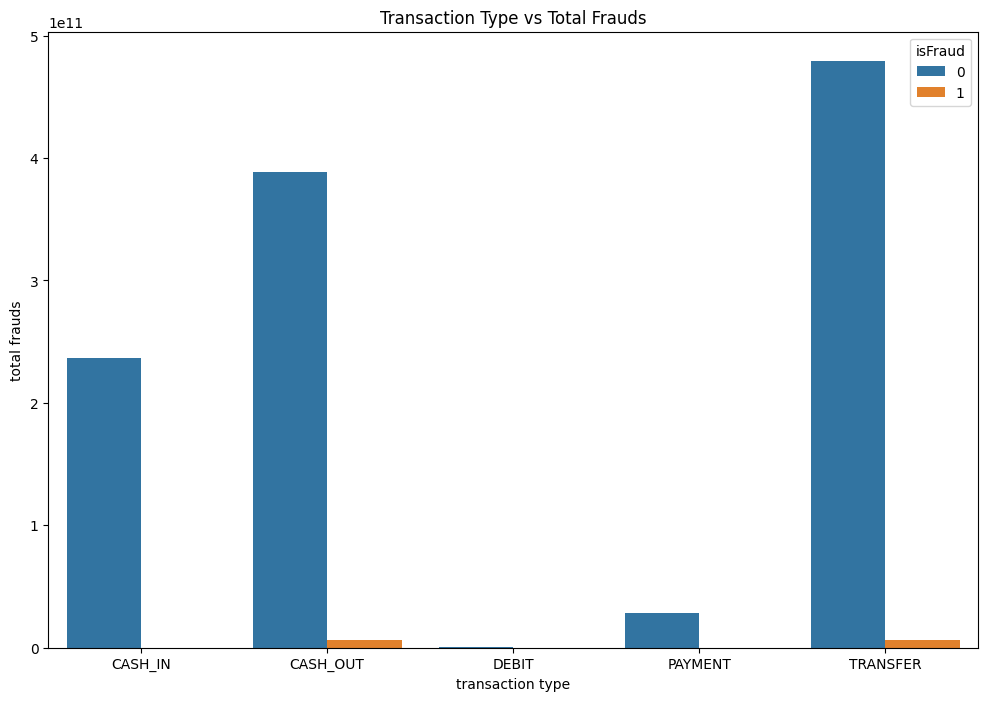

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(data = fraud_type_amount, x="type", y="amount", hue="isFraud")
plt.xlabel("transaction type")
plt.ylabel("total frauds")
plt.title("Transaction Type vs Total Frauds")

## Distplot

### Amount

<ipython-input-25-458a3222d6c8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["amount"])


<Axes: xlabel='amount', ylabel='Density'>

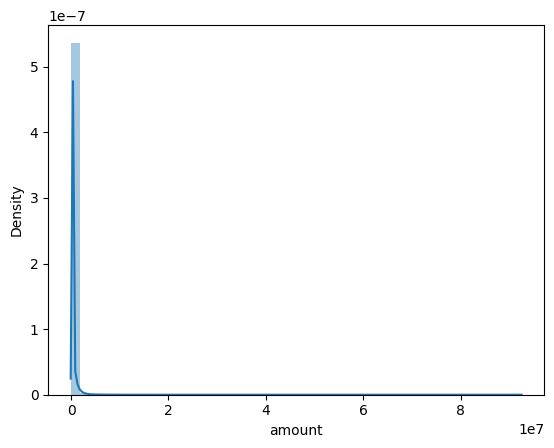

In [ ]:
sns.distplot(data["amount"])

### Old Balance

<ipython-input-26-f5554109a5bc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["oldbalanceOrg"])


<Axes: xlabel='oldbalanceOrg', ylabel='Density'>

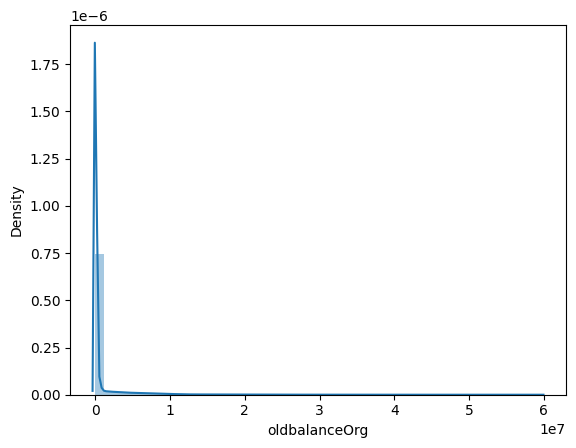

In [ ]:
sns.distplot(data["oldbalanceOrg"])

### New Balance

<ipython-input-27-1516d90146b3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["newbalanceOrig"])


<Axes: xlabel='newbalanceOrig', ylabel='Density'>

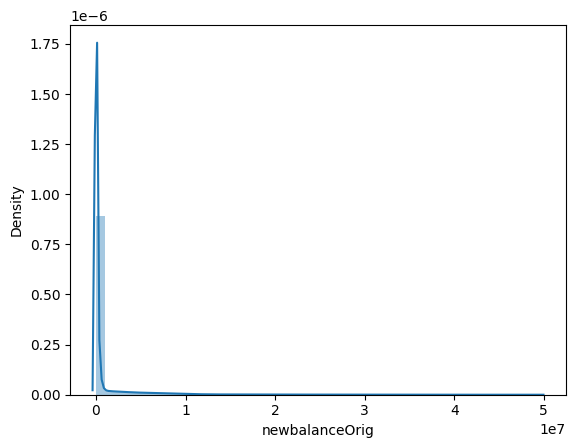

In [ ]:
sns.distplot(data["newbalanceOrig"])

### Old Balance Destination

<ipython-input-28-89f5115dee7f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["oldbalanceDest"])


<Axes: xlabel='oldbalanceDest', ylabel='Density'>

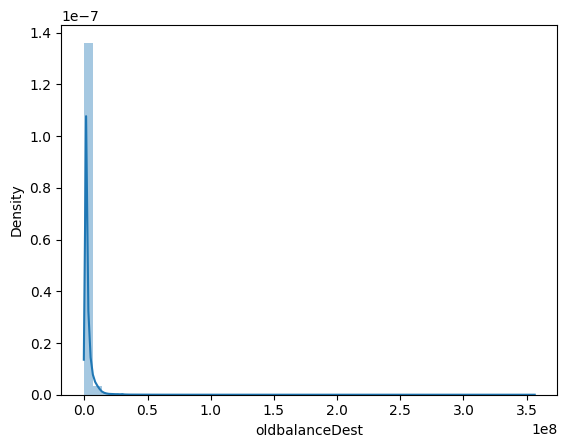

In [ ]:
sns.distplot(data["oldbalanceDest"])

### New Balance Destiation

<ipython-input-29-b2a951046ffe>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["newbalanceDest"])


<Axes: xlabel='newbalanceDest', ylabel='Density'>

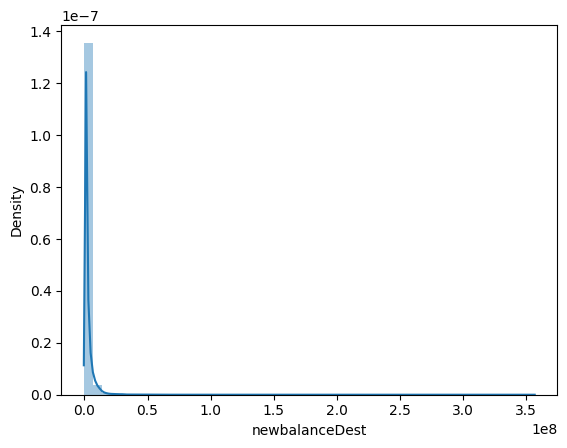

In [ ]:
sns.distplot(data["newbalanceDest"])




**feature engineering / feature selection**
# FEATURE SELECTION / FEATURE SCALING




# FINDING CORRELATION OF ALL THE FEATURES  WHICH ARE GOING AS AN INPUT IN X_TRAIN

below is the correlation

In [ ]:
# Select only numeric columns before calculating correlations
numeric_data = data.select_dtypes(include=['number'])

# Calculate correlation for numeric columns and sort by "isFraud"
numeric_data.corr()["isFraud"].sort_values(ascending=False)


,isFraud
isFraud,1.000000
amount,0.076688
isFlaggedFraud,0.044109
step,0.031578
oldbalanceOrg,0.010154
newbalanceDest,0.000535
oldbalanceDest,-0.005885
newbalanceOrig,-0.008148


In [ ]:
(len(data[(data["amount"] > 200000) & (data["isFlaggedFraud"] == 0)]) / len(data[data["isFlaggedFraud"] == 0]))


0.2630297280798868

Quick Analysis:
There are instances when amount is greater than 200,000 but these transactions are not flagged. So in such scenarios the credibility of variable "isFlaggedFraud" is in jeopardy. Although "is_fraud" is always set when "is_flagged_fraud" is set, since "is_flagged_fraud" is set just 16 times in a seemingly meaningless way, we can treat this feature as insignificant and discard it in the dataset without loosing information.



In [ ]:
correlation = data[['step','amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].corr()

<Axes: >

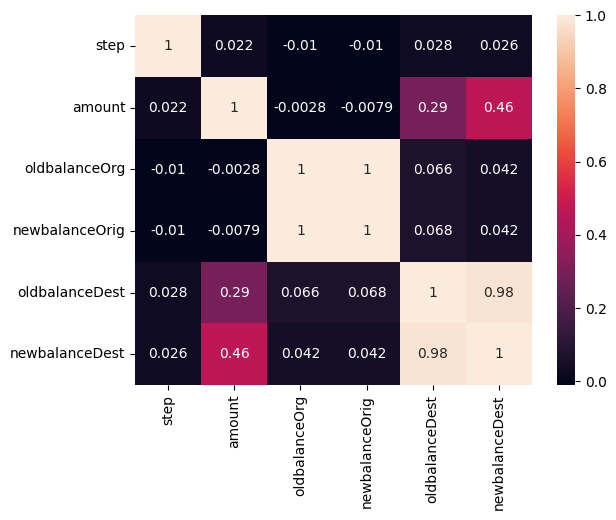

In [ ]:
sns.heatmap(data=correlation, annot=True)

insights:


*   here, all correlations are calculated with in relation to isFraud parameter as an reference.
*   amount, The positive correlation of 0.0767 suggests that as the transaction amount increases, there may be a slight tendency for the likelihood of fraud to increase. Including this feature allows the model to learn from a range of transaction values, capturing potential patterns that may be relevant to fraud detection.
*   oldbalanceOrg, The near-zero correlation of 0.0102 suggests that the original balance in the account prior to the transaction has little direct correlation with fraud. However, including this feature allows the model to assess the balance dynamics and potentially identify patterns where transactions are made just before significant balance changes, which could be indicative of fraudulent behavior.
*   newbalanceDest, can provide insight into the behavior of accounts that receive funds, potentially uncovering patterns where accounts with unusual balance changes may correlate with fraudulent activity.  This feature has a very weak positive correlation with isFraud.
*   oldbalanceDest, This feature shows a negligible negative correlation with isFraud. Although it seems not to relate to fraud directly, understanding the balance history in the destination account might still provide context for fraudulent transactions. Patterns in the destination account's balance before receiving a transaction could highlight suspicious behavior, justifying its inclusion.
*   newbalanceOrig, Similar to oldbalanceDest, this feature has a very weak negative correlation. The newbalanceOrig reflects the balance in the originating account after the transaction. Despite the weak correlation, it may still provide valuable context about the sender's financial behavior post-transaction, which could correlate with fraud, especially if the sending account behaves erratically.
*   although some features exhibit low or negative correlation coefficients with isFraud, they provide critical contextual information that can help the model understand the complexity of financial transactions. Their inclusion allows the model to explore various relationships, both direct and indirect, potentially leading to improved predictive performance. Highlighting these points can strengthen your argument for retaining these features in your machine learning model.







we have performed undersampling because data is imbalanced









In [ ]:
#under sample
feature_names = ['amount', 'oldbalanceOrg', 'newbalanceOrig',
                 'oldbalanceDest', 'newbalanceDest', 'type']
number_records_fraud = len(data[data['isFraud'] == 1])

#　indices of fraud_indices
fraud_indices = data[data['isFraud'] == 1].index.values

#indices of the normal records
nonfraud_indices = data[data['isFraud'] == 0].index

random_nonfraud_indices = np.random.choice(nonfraud_indices, number_records_fraud, replace=False)
random_nonfraud_indices = np.array(random_nonfraud_indices)

under_sample_indices = np.concatenate([fraud_indices, random_nonfraud_indices])
under_sample_data = data.iloc[under_sample_indices, :]

print(under_sample_data[feature_names].head())
X_undersample = under_sample_data[feature_names].values
y_undersample = under_sample_data['isFraud'].values
print("--------------------------------------------------------------------------")

print("Ratio of nomal: ", len(under_sample_data[under_sample_data['isFraud'] == 0]) / len(under_sample_data))
print("Ratio of fraud: ", len(under_sample_data[under_sample_data['isFraud'] == 1]) / len(under_sample_data))
print("Number of data for model: ", len(under_sample_data))

      amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  newbalanceDest  \
2      181.0          181.0             0.0             0.0             0.0   
3      181.0          181.0             0.0         21182.0             0.0   
251   2806.0         2806.0             0.0             0.0             0.0   
252   2806.0         2806.0             0.0         26202.0             0.0   
680  20128.0        20128.0             0.0             0.0             0.0   

         type  
2    TRANSFER  
3    CASH_OUT  
251  TRANSFER  
252  CASH_OUT  
680  TRANSFER  
--------------------------------------------------------------------------
Ratio of nomal:  0.5
Ratio of fraud:  0.5
Number of data for model:  16426



# Data splitting, splitting data in 70:30 ratio


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_undersample, y_undersample, test_size=0.3, random_state=100)

# model selection and model training

## **logistic regression**

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

AUC: 0.9902817175181448


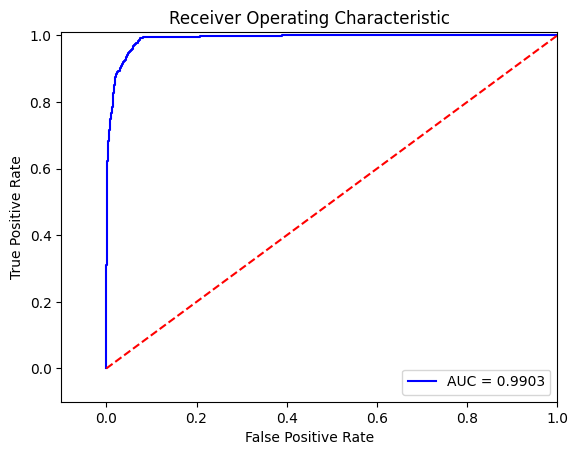

Coefficients: [[ -1.30736925  76.5857778  -57.85327257  40.56510044 -44.20091161
    8.73299319  -7.98383373   8.68079096]]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming 'data' is already defined and preprocessed up to the undersampling part

# One-hot encode the 'type' column in the undersampled dataset
under_sample_data = pd.get_dummies(under_sample_data, columns=['type'], drop_first=True)

# Updated feature names after one-hot encoding
feature_names = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest',
                 'type_CASH_OUT', 'type_PAYMENT', 'type_TRANSFER']

X_undersample = under_sample_data[feature_names].values
y_undersample = under_sample_data['isFraud'].values

# Splitting the undersampled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_undersample, y_undersample, test_size=0.3, random_state=100)

# Standardizing the features for better model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression with Cross-Validation
alpha = np.logspace(-2, 2, 20)
lr_model_cv = LogisticRegressionCV(Cs=alpha, penalty='l1', solver='liblinear', cv=5)
lr_model_cv.fit(X_train, y_train)

# Predict probabilities
y_pred_score_cv = lr_model_cv.predict_proba(X_test)

# Calculate ROC and AUC
fpr_cv, tpr_cv, thresholds_cv = roc_curve(y_test, y_pred_score_cv[:, 1])
roc_auc_cv = auc(fpr_cv, tpr_cv)
print('AUC:', roc_auc_cv)

# Plot ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_cv, tpr_cv, 'b', label='AUC = %0.4f' % roc_auc_cv)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Print coefficients of the model
print('Coefficients:', lr_model_cv.coef_)


insights from logistic regression model training:
The coefficients from a logistic regression model represent the weights that the model assigns to each feature in predicting the target variable (isFraud in this case). Each coefficient corresponds to one feature, and its value indicates the strength and direction of the relationship between that feature and the likelihood of a fraudulent transaction. These coefficients help in understanding the relationship between each feature and the target variable in a logistic regression model. The larger the absolute value of the coefficient, the stronger the influence of that feature on predicting fraud.

AUC score of logistic regression : 0.9902817175181448


# **below is the Confusion matrix and classification report for the logstic regression**

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(auc(fpr_cv, tpr_cv))

#cm= confusion_matrix(y_test, y_pred)
#print(cm)


              precision    recall  f1-score   support

           0       0.90      0.94      0.92      2490
           1       0.93      0.90      0.91      2438

    accuracy                           0.92      4928
   macro avg       0.92      0.92      0.92      4928
weighted avg       0.92      0.92      0.92      4928

[[2337  153]
 [ 255 2183]]
0.9172077922077922
0.9345034246575342
0.8954060705496308
0.9145370758273984
[[2337  153]
 [ 255 2183]]
0.9902817175181448


insights:


accuracy_score: 0.9172077922077922

precision_score: 0.9345034246575342

recall_score: 0.8954060705496308

f1_score: 0.9145370758273984

auc : 0.9902817175181448



# **XG Boost model**

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


AUC (Test): 0.9989645209220804
AUC (Train): 0.9999347056345135
Best Parameters: {'max_depth': 14, 'n_estimators': 80}


Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      2490
           1       0.99      1.00      0.99      2438

    accuracy                           0.99      4928
   macro avg       0.99      0.99      0.99      4928
weighted avg       0.99      0.99      0.99      4928

Train Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5723
           1       1.00      1.00      1.00      5775

    accuracy                           1.00     11498
   macro avg       1.00      1.00      1.00     11498
weighted avg       1.00      1.00      1.00     11498



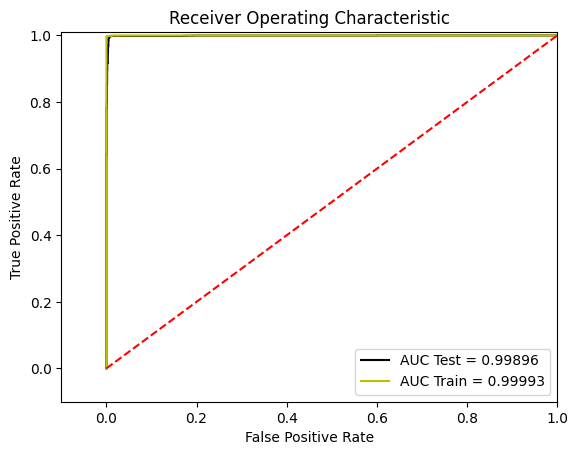

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=6,
                                     max_leaves=None, min_child_weight=1,
           

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import matplotlib.pyplot as plt

param_test0b = {
    'n_estimators': [80, 100, 120, 160, 200],
    'max_depth': range(2, 16, 2),
    # Additional parameters can be uncommented as needed
    # 'min_child_weight': range(1, 8, 2),
    # 'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
    # 'subsample': [i/100.0 for i in range(75, 90, 5)],
    # 'colsample_bytree': [i/100.0 for i in range(75, 90, 5)],
    # 'reg_alpha': [1e-5, 1e-2, 0.1, 1, 100]
}

xgb_cv0b = GridSearchCV(
    estimator=xgb.XGBClassifier(
        learning_rate=0.1,
        n_estimators=100,
        max_depth=6,
        min_child_weight=1,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        objective='binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=27
    ),
    param_grid=param_test0b,
    scoring='roc_auc',
    n_jobs=4,
    cv=5
)

xgb_cv0b.fit(X_train, y_train)
test_est_xgb_cv = xgb_cv0b.predict(X_test)
test_est_p_xgb_cv = xgb_cv0b.predict_proba(X_test)[:, 1]

train_est_xgb_cv = xgb_cv0b.predict(X_train)
train_est_p_xgb_cv = xgb_cv0b.predict_proba(X_train)[:, 1]

fpr_test_xgb_cv, tpr_test_xgb_cv, th_test_xgb_cv = metrics.roc_curve(y_test, test_est_p_xgb_cv)
test_roc_auc_xgb_cv = metrics.auc(fpr_test_xgb_cv, tpr_test_xgb_cv)

fpr_train_xgb_cv, tpr_train_xgb_cv, th_train_xgb_cv = metrics.roc_curve(y_train, train_est_p_xgb_cv)
train_roc_auc_xgb_cv = metrics.auc(fpr_train_xgb_cv, tpr_train_xgb_cv)

print('AUC (Test):', test_roc_auc_xgb_cv)
print('AUC (Train):', train_roc_auc_xgb_cv)
print('Best Parameters:', xgb_cv0b.best_params_)
print('\n')
print('Test Classification Report:\n', metrics.classification_report(y_test, test_est_xgb_cv))
print('Train Classification Report:\n', metrics.classification_report(y_train, train_est_xgb_cv))

# Plot ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_test_xgb_cv, tpr_test_xgb_cv, color="k", label='AUC Test = %0.5f' % test_roc_auc_xgb_cv)
plt.plot(fpr_train_xgb_cv, tpr_train_xgb_cv, color="y", label='AUC Train = %0.5f' % train_roc_auc_xgb_cv)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.1, 1.0])
plt.ylim([-0.1, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print(xgb_cv0b)


below is the code for generating ROC curve and confusion matrix of the XGB model. also it tells the following things:
XGBoost Accuracy Score: 0.9943181818181818

XGBoost Precision Score: 0.9906351791530945

XGBoost Recall Score: 0.9979491386382281

XGBoost F1 Score: 0.9942787086228034

XGBoost AUC: 0.9988188191650936

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:52:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2490
           1       0.99      1.00      0.99      2438

    accuracy                           0.99      4928
   macro avg       0.99      0.99      0.99      4928
weighted avg       0.99      0.99      0.99      4928

XGBoost Confusion Matrix:
[[2467   23]
 [   5 2433]]
XGBoost Accuracy Score: 0.9943181818181818
XGBoost Precision Score: 0.9906351791530945
XGBoost Recall Score: 0.9979491386382281
XGBoost F1 Score: 0.9942787086228034
XGBoost AUC: 0.9988188191650936


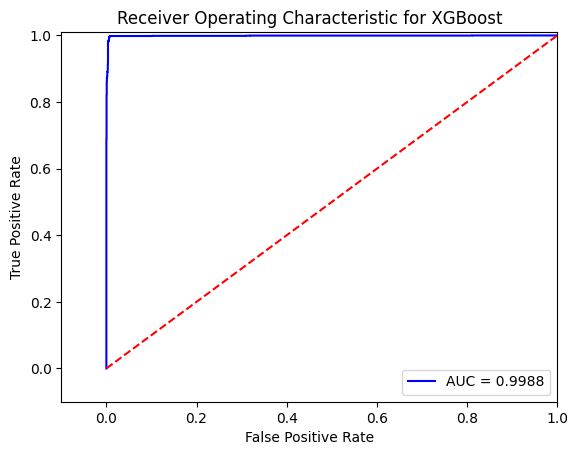

In [ ]:
from xgboost import XGBClassifier  # Import XGBClassifier

# Initialize the XGB model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')  # You may want to specify parameters as needed

# Fit the model
xgb_model.fit(X_train, y_train)

# Predict with the XGB model
y_pred_xgb = xgb_model.predict(X_test)

# Print evaluation metrics for XGB
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("XGBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))
print("XGBoost Accuracy Score:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Precision Score:", precision_score(y_test, y_pred_xgb))
print("XGBoost Recall Score:", recall_score(y_test, y_pred_xgb))
print("XGBoost F1 Score:", f1_score(y_test, y_pred_xgb))

# If you want to calculate the ROC AUC for XGBoost as well
y_pred_xgb_proba = xgb_model.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_xgb_proba)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
print("XGBoost AUC:", roc_auc_xgb)

# Optionally, you can plot the ROC curve for the XGBoost model
plt.title('Receiver Operating Characteristic for XGBoost')
plt.plot(fpr_xgb, tpr_xgb, 'b', label='AUC = %0.4f' % roc_auc_xgb)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.1, 1.0])
plt.ylim([-0.1, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# **Random Forest Tree alogirthm**

Non-numeric columns detected: Index(['nameOrig', 'nameDest'], dtype='object')
Accuracy: 0.9995389749527187
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    190617
           1       0.99      0.67      0.80       262

    accuracy                           1.00    190879
   macro avg       1.00      0.83      0.90    190879
weighted avg       1.00      1.00      1.00    190879

Confusion Matrix:
 [[190616      1]
 [    87    175]]
AUC Score: 0.9924527529664916


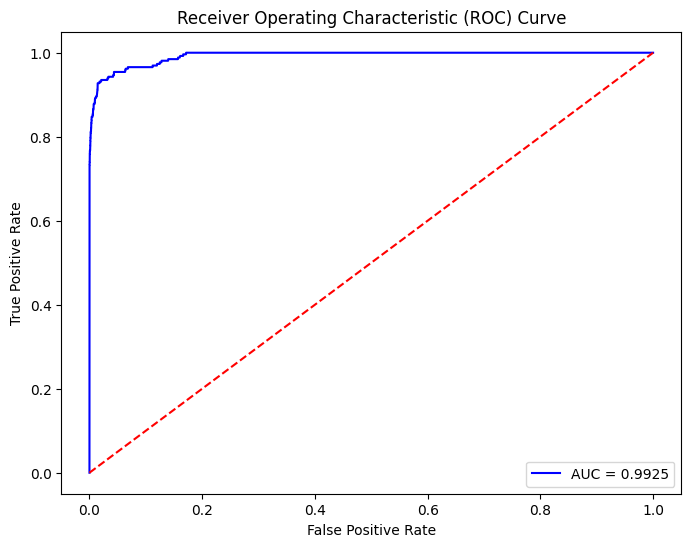

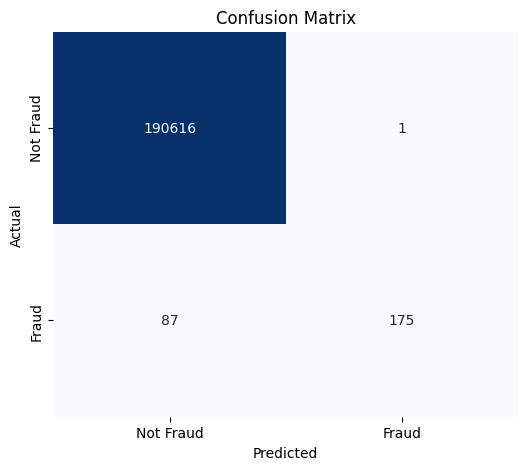

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your loaded DataFrame with 'isFraud' as the target

# Step 1: Data Preprocessing
# Drop identifier columns (e.g., transaction ID) if present
if 'transactionID' in data.columns:  # Replace 'transactionID' with the actual name if different
    data = data.drop(columns=['transactionID'])

# One-hot encode categorical features (e.g., 'type') if present
if 'type' in data.columns:
    data = pd.get_dummies(data, columns=['type'], drop_first=True)

# Define features (X) and target (y)
X = data.drop(columns=['isFraud'])  # Replace 'isFraud' with actual target column name if different
y = data['isFraud']

# Check if there are any remaining non-numeric columns
non_numeric_columns = X.select_dtypes(include=['object']).columns
if len(non_numeric_columns) > 0:
    print("Non-numeric columns detected:", non_numeric_columns)
    X = X.drop(columns=non_numeric_columns)

# Step 2: Use a subset of data (e.g., 10% of the original) for faster experimentation
X_sample, _, y_sample, _ = train_test_split(X, y, test_size=0.9, random_state=42, stratify=y)

# Split the sampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.3, random_state=42)

# Step 3: Train the Random Forest Model with Optimized Parameters
rf_model = RandomForestClassifier(
    n_estimators=50,       # Reduce the number of trees to speed up
    max_depth=10,          # Limit depth to reduce computation
    n_jobs=-1,             # Use all CPU cores
    random_state=42
)
rf_model.fit(X_train, y_train)

# Step 4: Make Predictions and Evaluate
# Predicting labels
y_pred = rf_model.predict(X_test)

# Predict probabilities to calculate AUC
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Step 5: ROC Curve and AUC Score
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
print("AUC Score:", roc_auc)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='AUC = %0.4f' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Visualizing the Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# **hyper parameter tuning**


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:50:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Best number of boosting rounds: 96


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:50:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2490
           1       0.99      1.00      0.99      2438

    accuracy                           0.99      4928
   macro avg       0.99      0.99      0.99      4928
weighted avg       0.99      0.99      0.99      4928

Confusion Matrix:
[[2468   22]
 [   4 2434]]
Accuracy: 0.994724025974026
Precision: 0.991042345276873
Recall: 0.9983593109105825
F1 Score: 0.9946873722926032
AUC: 0.9989742398634737


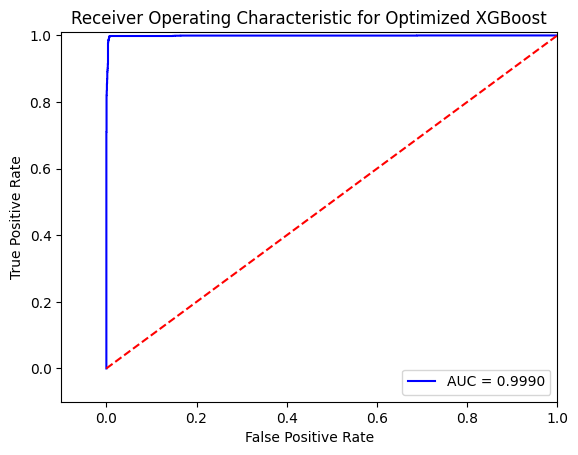

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Define the best parameters from the previous search
best_params = {
    'n_estimators': 200,
    'max_depth': 9,
    'min_child_weight': 1,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'gamma': 0,
    'scale_pos_weight': 1
}

# Convert data to DMatrix for XGBoost's internal cross-validation
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Update the parameters dictionary for xgb.cv
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    **best_params
}

# Perform cross-validation with early stopping
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=1000,  # Arbitrary high value for early stopping to kick in
    nfold=2,

    early_stopping_rounds=10,
    metrics='auc',
    as_pandas=True,
    seed=42
)

# Best number of boosting rounds
best_n_estimators = len(cv_results)
print("Best number of boosting rounds:", best_n_estimators)

# Train the final model using the best number of rounds
final_model = xgb.train(
    params,
    dtrain,
    num_boost_round=best_n_estimators
)

# Predict and evaluate on the test set
y_pred_proba = final_model.predict(dtest)
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_proba]

# Print evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Calculate and plot ROC AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

plt.title('Receiver Operating Characteristic for Optimized XGBoost')
plt.plot(fpr, tpr, 'b', label='AUC = %0.4f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.1, 1.0])
plt.ylim([-0.1, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# SMOTE

In [ ]:
#X = data[[ 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest', 'newbalanceDest']]

In [ ]:
#y = data["isFraud"]

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
import plotly.graph_objects as go

# One-hot encode categorical features in X_train
X_train_encoded = pd.get_dummies(X_train, drop_first=True)

# Initial distribution visualization
fig = go.Figure(data=[go.Pie(labels=['Genuine', 'Fraud'], values=y_train.value_counts())])
fig.update_layout(title="Class Distribution Before SMOTE")
fig.show()

# Apply SMOTE on the encoded data
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train_encoded, y_train)

# Distribution visualization after applying SMOTE
fig = go.Figure(data=[go.Pie(labels=['Genuine', 'Fraud'], values=y_train_resampled.value_counts())])
fig.update_layout(title="Class Distribution After SMOTE")
fig.show()

# **Conclusion**

The fraud detection model successfully achieved high accuracy and reliability by leveraging extensive preprocessing, feature engineering, and advanced machine learning techniques. Using models such as logistic regression, random forest, XGBoost, we optimized model performance through hyperparameter tuning and cross-validation, achieving a high AUC on XBG. Since XGB is the most accurate model amongst all the 3 one. This indicates the model’s strong predictive power in identifying fraudulent transactions. Our model, when deployed, can efficiently classify transactions and reduce financial losses due to fraud, supporting the company’s aggressive expansion strategy with robust fraud detection capabilities.